<a href="https://colab.research.google.com/github/rimjhimkhanna09/AIML-Advance-/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/heart.csv')

# Show first few rows
print(df.head())

# Check for null values
print(df.info())

# Basic stats
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

✅ Step 2: Train a Decision Tree Classifier and Visualize

Decision Tree Accuracy: 0.9853658536585366


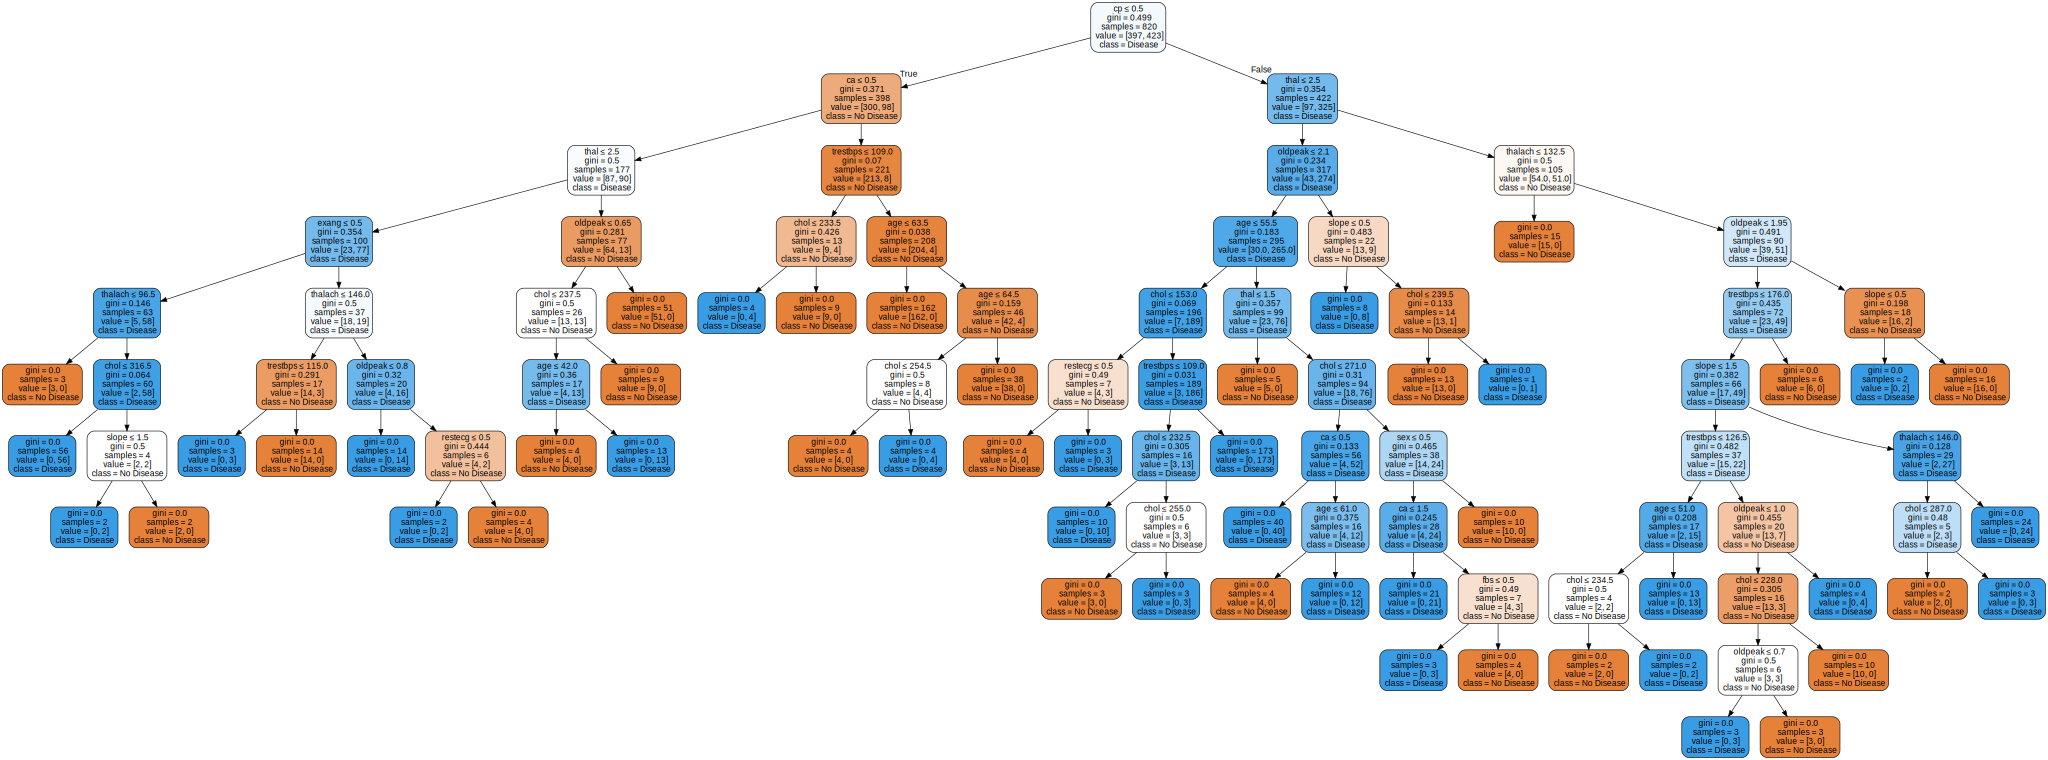

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Accuracy
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

# Visualize the tree
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns,
                           class_names=["No Disease", "Disease"],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves as decision_tree.pdf
graph  # Displays in notebook if supported


✅ Step 3: Analyze Overfitting and Control Tree Depth


In [3]:
# Limit max depth to control overfitting
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)

print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Decision Tree Accuracy: 0.8


✅ Step 4: Train a Random Forest and Compare Accuracy


In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


✅ Step 5: Interpret Feature Importances


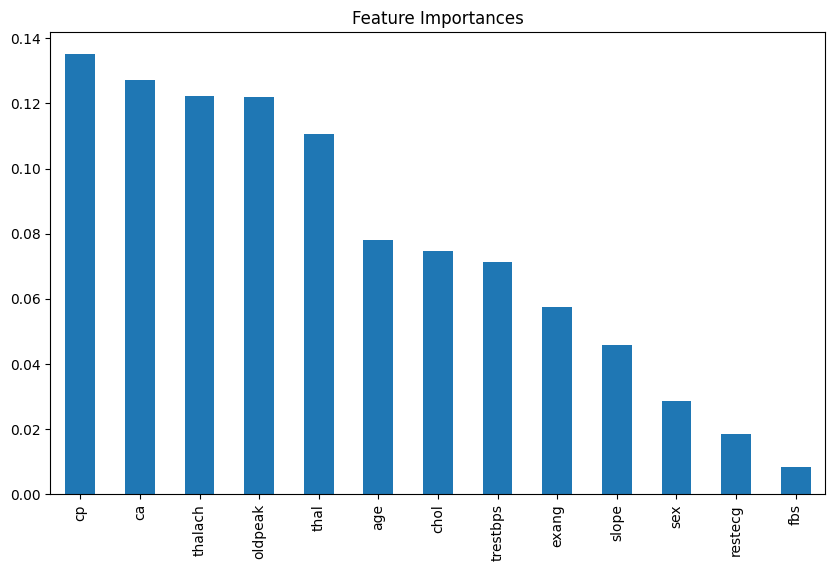

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
importances = rf.feature_importances_
features = pd.Series(importances, index=X.columns)
features.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Feature Importances")
plt.show()


✅ Step 6: Evaluate Using Cross-Validation


In [6]:
from sklearn.model_selection import cross_val_score

# Cross-validation score
cv_scores_dt = cross_val_score(dt_pruned, X, y, cv=5)
cv_scores_rf = cross_val_score(rf, X, y, cv=5)

print("Cross-Validated Accuracy (Decision Tree):", cv_scores_dt.mean())
print("Cross-Validated Accuracy (Random Forest):", cv_scores_rf.mean())


Cross-Validated Accuracy (Decision Tree): 0.8341463414634147
Cross-Validated Accuracy (Random Forest): 0.9970731707317073
